<a href="https://colab.research.google.com/github/SAURABH-CHAMOLI/HandWrittenDigitRecognization-CNN/blob/main/HandWrittenDigitRecognization(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
(X_train,Y_train) , (X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Number of Training and Validation Samples
print(len(X_train))
print(len(X_test))

60000
10000


In [ ]:
# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
# Shape of Training and Validation Dataset
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#Normalization
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Y_train = Y_train.astype('int32')
Y_test = Y_test.astype('int32')

In [ ]:
# creating Sequential class model object
model=Sequential();

model.add(Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
history=model.fit(X_train,Y_train,epochs=10,batch_size=128,validation_data=(X_test,Y_test))

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0362 - accuracy: 0.9912 - val_loss: 0.0567 - val_accuracy: 0.9861
Epoch 2/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0377 - accuracy: 0.9902 - val_loss: 0.0547 - val_accuracy: 0.9886
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0351 - accuracy: 0.9912 - val_loss: 0.0641 - val_accuracy: 0.9873
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0303 - accuracy: 0.9917 - val_loss: 0.0593 - val_accuracy: 0.9866
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0285 - accuracy: 0.9923 - val_loss: 0.0593 - val_accuracy: 0.9871
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0250 - accuracy: 0.9934 - val_loss: 0.0606 - val_accuracy: 0.9884
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0211 - accuracy: 0.9940 - val_loss: 0.0668 - val_accuracy: 0.9887
Epoch

In [ ]:
Y_prob=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
Y_pred=Y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9885

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0629 - accuracy: 0.9885
Test Loss: 0.06285378336906433
Test Accuracy: 0.9884999990463257


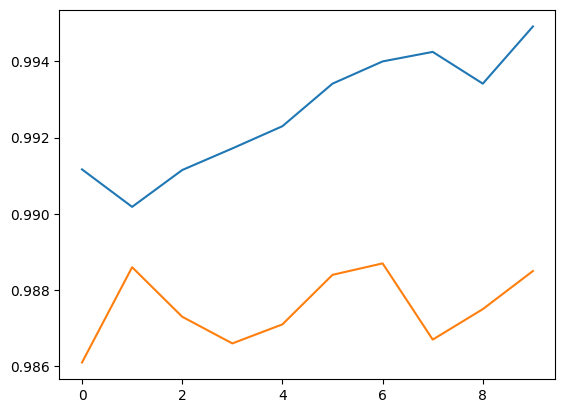

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

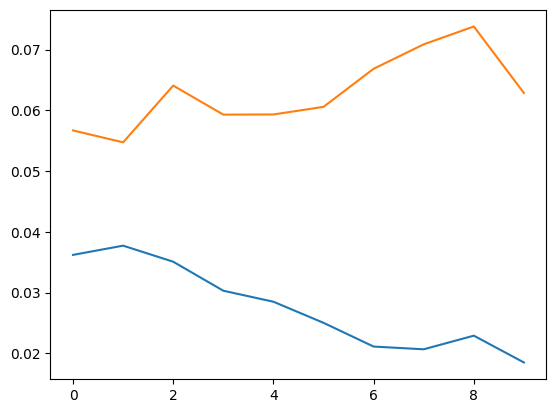

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

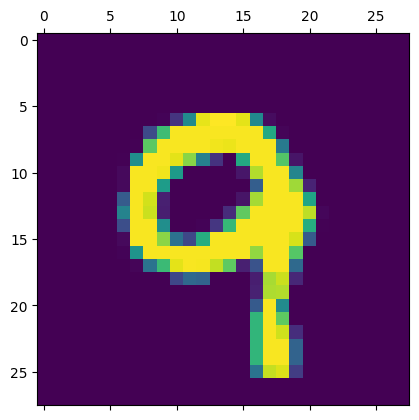

In [ ]:
plt.matshow(X_test[99])

In [ ]:
print(model.predict(X_test[99].reshape(1,28,28,1)).argmax(axis=1))

1/1 [==============================] - 0s 177ms/step
[9]
